In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
movies= pd.read_csv('../data/movie.csv')
ratings=pd.read_csv('../data/rating.csv')

print('--Peliculas--')
display(movies.head())
print('--rating--')
display(ratings.head())

--Peliculas--


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


--rating--


,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


# Limpieza inicial
- ## Valores nulos

In [5]:
print(movies.isnull().sum())
print(ratings.isnull().sum())

movieId    0
title      0
genres     0
dtype: int64
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64


- ## Detectando duplicados

In [6]:
duplicados=movies.duplicated(subset='movieId').sum()
print(f"Peliculas duplicados: {duplicados}")

Peliculas duplicados: 0


# Transformacion de datos

In [7]:
movies["year"]=movies["title"].str.extract('(\(\d{4}\))',expand=False)
movies["year"]=movies["year"].str.extract('(\d{4})', expand=False)

movies["title"]=movies["title"].str.replace('(\(\d{4}\))','',regex=True)

movies.head()

,movieId,title,genres,year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji,Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II,Comedy,1995


# Unir tablas

In [8]:
df_combined=pd.merge(ratings,movies, on="movieId")
df_combined.head()

,userId,movieId,rating,timestamp,title,genres,year
0,1,2,3.5,2005-04-02 23:53:47,Jumanji,Adventure|Children|Fantasy,1995
1,1,29,3.5,2005-04-02 23:31:16,"City of Lost Children, The (Cité des enfants p...",Adventure|Drama|Fantasy|Mystery|Sci-Fi,1995
2,1,32,3.5,2005-04-02 23:33:39,Twelve Monkeys (a.k.a. 12 Monkeys),Mystery|Sci-Fi|Thriller,1995
3,1,47,3.5,2005-04-02 23:32:07,Seven (a.k.a. Se7en),Mystery|Thriller,1995
4,1,50,3.5,2005-04-02 23:29:40,"Usual Suspects, The",Crime|Mystery|Thriller,1995


# Filtrado de ruido

In [12]:
movie_count=df_combined.groupby('title')['rating'].count()
popular_movies=movie_count[movie_count >= 50].index


df_filtered = df_combined[df_combined['title'].isin(popular_movies)]

print(f"Pasamos de {df_combined.shape[0]} registros a {df_filtered.shape[0]} después del filtro.")

Pasamos de 20000263 registros a 19854126 después del filtro.


# Visualizacion de datos 

C:\Users\Alienware X15\AppData\Local\Temp\ipykernel_2276\3745512092.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=df_filtered, palette='viridis')


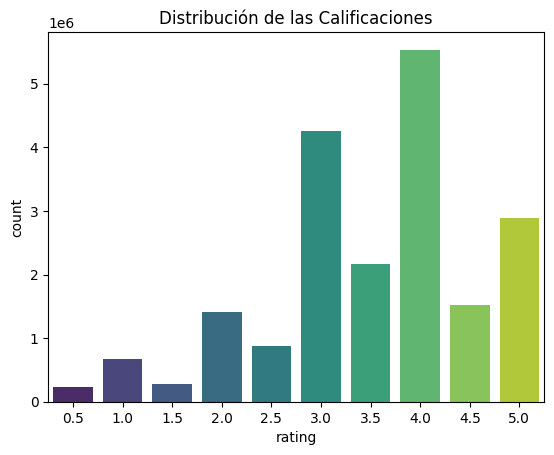

In [14]:
sns.countplot(x='rating', data=df_filtered, palette='viridis')
plt.title('Distribución de las Calificaciones')
plt.show()

### * Esta visualizacion muestra cuántas calificaciones tiene cada película. Verás que pocas tienen muchas y la mayoría casi nada. Esto justifica por qué necesitamos un sistema de recomendación.

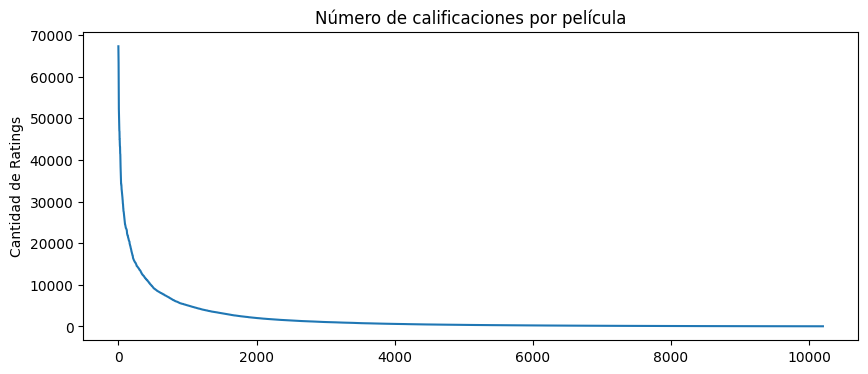

In [15]:
movie_ratings_count = df_filtered.groupby('title')['rating'].count().sort_values(ascending=False)
plt.figure(figsize=(10,4))
plt.plot(movie_ratings_count.values)
plt.title('Número de calificaciones por película')
plt.ylabel('Cantidad de Ratings')
plt.show()